In [13]:
import pandas as pd
import numpy as np

In [14]:
df=pd.read_csv('titanic.csv')

In [15]:
df.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [16]:
df['cabin_num']=df['Cabin'].str.extract('(\d+)')#extract numerical part

In [17]:
df['cabin_cat'] = df['Cabin'].str.extract('([A-Z]{1})') # captures the first letter
df.head()

,Cabin,Ticket,number,Survived,cabin_num,cabin_cat
0,NaN,A/5 21171,5,0,NaN,NaN
1,C85,PC 17599,3,1,85,C
2,NaN,STON/O2. 3101282,6,1,NaN,NaN
3,C123,113803,3,1,123,C
4,NaN,373450,A,0,NaN,NaN


In [22]:
df['Ticket_cat']=df['Ticket'].str.extract('([A-Z]*)')

In [23]:
df.head()

,Cabin,Ticket,number,Survived,cabin_num,cabin_cat,Ticket_num,Ticket_cat
0,NaN,A/5 21171,5,0,NaN,NaN,A,A
1,C85,PC 17599,3,1,85,C,PC,PC
2,NaN,STON/O2. 3101282,6,1,NaN,NaN,STON,STON
3,C123,113803,3,1,123,C,,
4,NaN,373450,A,0,NaN,NaN,,


In [24]:
df['Ticket_numeric']=df['Ticket'].str.extract('([0-9]*)')

In [26]:
df.drop(columns='Ticket_num',inplace=True)

In [27]:
df.head()

,Cabin,Ticket,number,Survived,cabin_num,cabin_cat,Ticket_cat,Ticket_nume
0,NaN,A/5 21171,5,0,NaN,NaN,A,
1,C85,PC 17599,3,1,85,C,PC,
2,NaN,STON/O2. 3101282,6,1,NaN,NaN,STON,
3,C123,113803,3,1,123,C,,113803
4,NaN,373450,A,0,NaN,NaN,,373450


In [29]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

The idea is to seperate the categorical and numerical columns from the number column.

In [31]:
df['number_numerical']=pd.to_numeric(df['number'],errors='coerce',downcast='integer')

In [32]:
df['number_categorical']=np.where(df['number_numerical'].isnull(),df['number'],np.nan)

In [33]:
df.head()

,Cabin,Ticket,number,Survived,cabin_num,cabin_cat,Ticket_cat,Ticket_nume,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,NaN,NaN,A,,5.0,NaN
1,C85,PC 17599,3,1,85,C,PC,,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,NaN,NaN,STON,,6.0,NaN
3,C123,113803,3,1,123,C,,113803,3.0,NaN
4,NaN,373450,A,0,NaN,NaN,,373450,NaN,A


In [42]:
df.drop(columns=['Ticket_cat','Ticket_nume'],inplace=True)

In [43]:
df.head()

,Cabin,Ticket,number,Survived,cabin_num,cabin_cat,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,NaN,NaN,5.0,NaN
1,C85,PC 17599,3,1,85,C,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,NaN,NaN,6.0,NaN
3,C123,113803,3,1,123,C,3.0,NaN
4,NaN,373450,A,0,NaN,NaN,NaN,A


In [44]:
df['ticket_num']=df['Ticket'].apply(lambda s: s.split()[-1])

In [47]:
df['ticket_num']=pd.to_numeric(df['ticket_num'],errors='coerce',downcast='integer')

In [50]:
df['ticket_cat']=df['Ticket'].apply(lambda s: s.split()[0])

In [52]:
df['ticket_cat']=np.where(df['ticket_cat'].str.isdigit(),np.nan,df['ticket_cat'])

In [54]:
df.sample(10)

,Cabin,Ticket,number,Survived,cabin_num,cabin_cat,number_numerical,number_categorical,ticket_num,ticket_cat
469,NaN,2666,4,1,NaN,NaN,4.0,NaN,2666.0,NaN
413,NaN,239853,5,0,NaN,NaN,5.0,NaN,239853.0,NaN
140,NaN,2678,2,0,NaN,NaN,2.0,NaN,2678.0,NaN
247,NaN,250649,2,1,NaN,NaN,2.0,NaN,250649.0,NaN
603,NaN,364511,2,0,NaN,NaN,2.0,NaN,364511.0,NaN
861,NaN,28134,2,0,NaN,NaN,2.0,NaN,28134.0,NaN
806,A36,112050,1,0,36,A,1.0,NaN,112050.0,NaN
388,NaN,367655,6,0,NaN,NaN,6.0,NaN,367655.0,NaN
834,NaN,2223,6,0,NaN,NaN,6.0,NaN,2223.0,NaN
679,B51 B53 B55,PC 17755,5,1,51,B,5.0,NaN,17755.0,PC


<AxesSubplot:xlabel='cabin_cat', ylabel='count'>

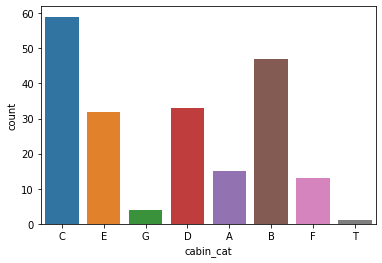

In [57]:
import seaborn as sns
sns.countplot(data=df,x='cabin_cat',)

<AxesSubplot:>

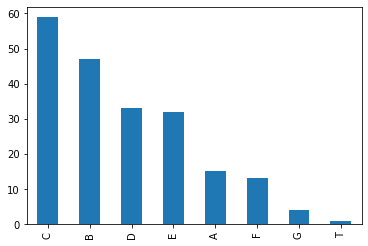

In [59]:
df['cabin_cat'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='cabin_cat', ylabel='number_numerical'>

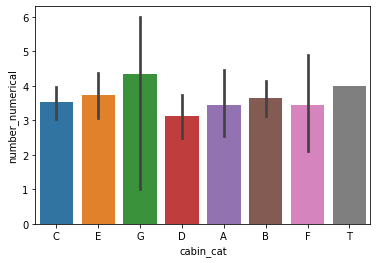

In [61]:
sns.barplot(data=df,x='cabin_cat',y='number_numerical')